In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
labelfile = 'train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labelfile)


In [3]:
#Preprocessing Data
filtered1_images=[]
filtered1_labels=[]
filtered2_images=[]
filtered2_labels=[]
filtered0_images=[]
filtered0_labels=[]
for i in range(0,len(labelarray)):
    if(labelarray[i]==0):
        filtered0_images.append(imagearray[i])
        filtered0_labels.append(labelarray[i])
    elif(labelarray[i]==1):
        filtered1_images.append(imagearray[i])
        filtered1_labels.append(labelarray[i])
    elif(labelarray[i]==2):
        filtered2_images.append(imagearray[i])
        filtered2_labels.append(labelarray[i])
filtered1_images = np.array(filtered1_images)
filtered1_labels = np.array(filtered1_labels)
filtered2_images = np.array(filtered2_images)
filtered2_labels = np.array(filtered2_labels)
filtered0_images = np.array(filtered0_images)
filtered0_labels = np.array(filtered0_labels)
data_set_images_index=[]
#Choosing 200 randomly for each class
data_set_images_index.append(np.random.choice(len(filtered0_images),200,False))
data_set_images_index.append(np.random.choice(len(filtered1_images),200,False))
data_set_images_index.append(np.random.choice(len(filtered2_images),200,False))
data_set_images=np.concatenate([
    filtered0_images[data_set_images_index[0]],
    filtered1_images[data_set_images_index[1]],
    filtered2_images[data_set_images_index[2]]
])
train_set_images=np.concatenate([
    data_set_images[0:100],
    data_set_images[200:300],
    data_set_images[400:500]
])
train_set_labels=np.array([0]*100 +[1]*100 +[2]*100)
test_set_images=np.concatenate([
    data_set_images[100:200],
    data_set_images[300:400],
    data_set_images[500:600]
])
test_set_labels=np.array([0]*100 +[1]*100 +[2]*100)
train_set_images = train_set_images.reshape(300, -1)
test_set_images = test_set_images.reshape(300, -1)
train_set_images=train_set_images.astype(np.float32) / 255.0
test_set_images=test_set_images.astype(np.float32) / 255.0
train_set_images=train_set_images.T
test_set_images=test_set_images.T
X_train_set_images=train_set_images
X_test_set_images=test_set_images

# print(train_set_images.shape)
# print(test_set_images.shape)
    


In [ ]:
#Functions for Calculating MLE estimates
def mean(train_set_images_i):
    return np.mean(train_set_images_i, axis=1)  
def covariance(train_set_images_i, mean_i):
    diff = train_set_images_i - mean_i[:, None]
    covariance = 1/100 * (diff @ diff.T)
    return covariance + np.eye(covariance.shape[0])*1e-6
def likelihood(x, mean_i, cov_inv, cov_det):
    if(cov_det==0):
        cov_det=5e-324#Smallest possible postive value in python
    diff = (x - mean_i).reshape(-1, 1) 
    return -0.5 * np.log(cov_det) - 0.5 * (diff.T @ cov_inv @ diff).item()
mean_0 = mean(train_set_images[:, :100])
cov_0 = covariance(train_set_images[:, :100], mean_0)
mean_1 = mean(train_set_images[:, 100:2*100])
cov_1 = covariance(train_set_images[:, 100:2*100], mean_1)
mean_2 = mean(train_set_images[:, 2*100:3*100])
cov_2 = covariance(train_set_images[:, 2*100:3*100], mean_2)
cov_inv0, cov_det0 = np.linalg.inv(cov_0), np.linalg.det(cov_0)
cov_inv1, cov_det1 = np.linalg.inv(cov_1), np.linalg.det(cov_1)
cov_inv2, cov_det2 = np.linalg.inv(cov_2), np.linalg.det(cov_2)
def predict(x):
    p0 = likelihood(x, mean_0, cov_inv0, cov_det0)
    p1 = likelihood(x, mean_1, cov_inv1, cov_det1)
    p2 = likelihood(x, mean_2, cov_inv2, cov_det2)
    return np.argmax([p0, p1, p2])
predictions = np.array([predict(test_set_images[:, i]) for i in range(test_set_images.shape[1])])
accuracy = np.mean(predictions == test_set_labels)
print("Mean of class 0",mean_0)
print("Mean of class 1",mean_1)
print("Mean of class 2",mean_2)
print(f"Classification Accuracy after applying discriminant analysis on data: {accuracy * 100:.2f}%")


(784,)
(784, 784)
Mean of class 0 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [ ]:
#PCA
def PCA(train_set_images,test_set_images,variance=0.95):
    data_mean=np.mean(train_set_images, axis=1).reshape(-1,1)#Global mean
    centred_train_set_images=train_set_images-data_mean
    centred_covariance=(centred_train_set_images)@(centred_train_set_images).T*(1/299)
    eValue,eVectors=np.linalg.eig(centred_covariance)
    eValue=eValue[np.argsort(eValue)[::-1]]
    eVectors=eVectors[:,np.argsort(eValue)[::-1]]
    total_Variance=sum(eValue)
    var=0
    count=0
    #Finding p
    while(var<variance*total_Variance):
        var+=eValue[count]
        count+=1
    U_p=eVectors[:,:count]
    # print(U_p.shape)
    Y=U_p.T@centred_train_set_images
    centred_test_images=test_set_images-data_mean
    Y_test=U_p.T@centred_test_images
    meancentred_0 = mean(Y[:, :100])
    covcentred_0 = covariance(Y[:, :100], meancentred_0)
    meancentred_1 = mean(Y[:, 100:2*100])
    covcentred_1 = covariance(Y[:, 100:2*100], meancentred_1)
    meancentred_2 = mean(Y[:, 2*100:3*100])
    covcentred_2 = covariance(Y[:, 2*100:3*100], meancentred_2)
    covcentred_inv0, covcentred_det0 = np.linalg.inv(covcentred_0), np.linalg.det(covcentred_0)
    covcentred_inv1, covcentred_det1 = np.linalg.inv(covcentred_1), np.linalg.det(covcentred_1)
    covcentred_inv2, covcentred_det2 = np.linalg.inv(covcentred_2), np.linalg.det(covcentred_2)
    #QDA on the data after applying PCA
    def predict(x):
        p0 = likelihood(x, meancentred_0, covcentred_inv0, covcentred_det0)
        p1 = likelihood(x, meancentred_1, covcentred_inv1, covcentred_det1)
        p2 = likelihood(x, meancentred_2, covcentred_inv2, covcentred_det2)
        return np.argmax([p0, p1, p2])
    predictions = np.array([predict(Y_test[:, i]) for i in range(Y_test.shape[1])])
    accuracy = np.mean(predictions == test_set_labels)
    print(f"Classification Accuracy: {accuracy * 100:.2f}%"+" for variance=",variance*100,"%"+"after QDA")
    cov_centred=(1/3)*(covcentred_0+covcentred_1+covcentred_2)#For LDA we asssume same matrix for all
    cov_i=np.linalg.inv(cov_centred)
    #LDA on the data after applying PCA
    def predict_lda(x):
        g0=(cov_i@meancentred_0).T@x-0.5*(meancentred_0).T@(cov_centred)@(meancentred_0)
        g1=(cov_i@meancentred_1).T@x-0.5*(meancentred_1).T@(cov_centred)@(meancentred_1)
        g2=(cov_i@meancentred_2).T@x-0.5*(meancentred_2).T@(cov_centred)@(meancentred_2)
        return np.argmax([g0,g1,g2])
    predictions = np.array([predict_lda(Y_test[:, i]) for i in range(Y_test.shape[1])])
    accuracy = np.mean(predictions == test_set_labels)
    print(f"Classification Accuracy: {accuracy * 100:.2f}%"+" for variance=",variance*100,"%"+"after LDA")
PCA(train_set_images,test_set_images,0.95)
PCA(train_set_images,test_set_images,0.90)


(784, 83)
Classification Accuracy: 91.67% for variance= 95.0 %after QDA
Classification Accuracy: 96.67% for variance= 95.0 %after LDA
(784, 51)
Classification Accuracy: 96.67% for variance= 90.0 %after QDA
Classification Accuracy: 97.00% for variance= 90.0 %after LDA


In [6]:
#PCA with using top two components
data_mean=np.mean(train_set_images, axis=1).reshape(-1,1)
centred_train_set_images=train_set_images-data_mean
centred_covariance=(centred_train_set_images)@(centred_train_set_images).T*(1/299)
eValue,eVectors=np.linalg.eig(centred_covariance)
sorted_indices=np.argsort(eValue)[::-1]
eValue=eValue[sorted_indices]
eVectors=eVectors[:,sorted_indices]
count=2
U_p=eVectors[:,:count]
Y=U_p.T@centred_train_set_images
centred_test_images=test_set_images-data_mean
Y_test=U_p.T@centred_test_images
meancentred_0 = mean(Y[:, :100])
covcentred_0 = covariance(Y[:, :100], meancentred_0)

meancentred_1 = mean(Y[:, 100:2*100])
covcentred_1 = covariance(Y[:, 100:2*100], meancentred_1)

meancentred_2 = mean(Y[:, 2*100:3*100])
covcentred_2 = covariance(Y[:, 2*100:3*100], meancentred_2)
covcentred_inv0, covcentred_det0 = np.linalg.inv(covcentred_0), np.linalg.det(covcentred_0)
covcentred_inv1, covcentred_det1 = np.linalg.inv(covcentred_1), np.linalg.det(covcentred_1)
covcentred_inv2, covcentred_det2 = np.linalg.inv(covcentred_2), np.linalg.det(covcentred_2)
def predict(x):
    p0 = likelihood(x, meancentred_0, covcentred_inv0, covcentred_det0)
    p1 = likelihood(x, meancentred_1, covcentred_inv1, covcentred_det1)
    p2 = likelihood(x, meancentred_2, covcentred_inv2, covcentred_det2)
    return np.argmax([p0, p1, p2])
predictions = np.array([predict(Y_test[:, i]) for i in range(Y_test.shape[1])])
accuracy = np.mean(predictions == test_set_labels)
print(f"Classification Accuracy: {accuracy * 100:.2f}% for test set")
predictions = np.array([predict(Y[:, i]) for i in range(Y.shape[1])])
accuracy = np.mean(predictions == train_set_labels)
print(f"Classification Accuracy: {accuracy * 100:.2f}% for train set")



Classification Accuracy: 92.00% for test set
Classification Accuracy: 93.00% for train set


In [ ]:
data_mean=np.mean(X_train_set_images, axis=1).reshape(-1,1)
S_b=100*((mean_0-data_mean)@(mean_0-data_mean).T+(mean_1-data_mean)@(mean_1-data_mean).T+(mean_2-data_mean)@(mean_2-data_mean).T)
S_w=((train_set_images[:,:100]-mean_0[:,None])@(train_set_images[:,:100]-mean_0[:,None]).T+(train_set_images[:,100:200]-mean_1[:,None])@(train_set_images[:,100:200]-mean_1[:,None]).T+(train_set_images[:,200:300]-mean_2[:,None])@(train_set_images[:,200:300]-mean_2[:,None]).T)
S_t=(train_set_images-data_mean)@(train_set_images-data_mean).T
S_b=S_t-S_w
#Generalized eigen value solved by finding (S_w)-1*S_b
eValueFDA,eVectorsFDA=np.linalg.eigh(np.linalg.pinv(S_w)@S_b)#Handling complex values using eigh
sorted_indices=np.argsort(eValueFDA)[::-1]
eValueFDA=eValueFDA[sorted_indices]
eVectorsFDA=eVectorsFDA[:,sorted_indices]
W=eVectorsFDA[:,:2]
# print(W.shape)
Y_train_Fischer=W.T@train_set_images
Y_test_Fischer=W.T@test_set_images
mean_lda_0 = np.mean(Y_train_Fischer[:, :100], axis=1)
mean_lda_1 = np.mean(Y_train_Fischer[:, 100:200], axis=1)
mean_lda_2 = np.mean(Y_train_Fischer[:, 200:300], axis=1)
cov_lda_0=covariance(Y_train_Fischer[:,:100],mean_lda_0)
cov_lda_1=covariance(Y_train_Fischer[:,100:200],mean_lda_1)
cov_lda_2=covariance(Y_train_Fischer[:,200:300],mean_lda_2)
cov=(1/3)*(cov_lda_0+cov_lda_1+cov_lda_2)
cov+=np.eye(cov.shape[0])*1e-6
cov_i=np.linalg.inv(cov)
#LDA after FDA
def predict_lda(x):
    g0=(cov_i@mean_lda_0).T@x-0.5*(mean_lda_0).T@(cov)@(mean_lda_0)
    g1=(cov_i@mean_lda_1).T@x-0.5*(mean_lda_1).T@(cov)@(mean_lda_1)
    g2=(cov_i@mean_lda_2).T@x-0.5*(mean_lda_2).T@(cov)@(mean_lda_2)
    return np.argmax([g0,g1,g2])
predictions_lda = np.array([predict_lda(Y_test_Fischer[:, i]) for i in range(Y_test_Fischer.shape[1])])
predictions_train_lda = np.array([predict_lda(Y_train_Fischer[:, i]) for i in range(Y_train_Fischer.shape[1])])
accuracy_test_lda = np.mean(predictions_lda == test_set_labels)
accuracy_train_lda=np.mean(predictions_train_lda == train_set_labels)
print(f"Fischer LDA Classification test Accuracy: {accuracy_test_lda * 100:.2f}%")
print(f"Fischer LDA Classification train Accuracy: {accuracy_train_lda * 100:.2f}%")

(784, 2)
Fischer LDA Classification test Accuracy: 87.67%
Fischer LDA Classification train Accuracy: 89.00%


In [8]:
mean_qda_0 = mean(Y_train_Fischer[:, :100])
mean_qda_1 = mean(Y_train_Fischer[:, 100:200])
mean_qda_2 = mean(Y_train_Fischer[:, 200:300])
covQDA_0 = covariance(Y_train_Fischer[:, :100], mean_qda_0)
covQDA_1 = covariance(Y_train_Fischer[:, 100:200], mean_qda_1)
covQDA_2 = covariance(Y_train_Fischer[:, 200:300], mean_qda_2)
covQDA_inv0, covQDA_det0 = np.linalg.inv(covQDA_0), np.linalg.det(covQDA_0)
covQDA_inv1, covQDA_det1 = np.linalg.inv(covQDA_1), np.linalg.det(covQDA_1)
covQDA_inv2, covQDA_det2 = np.linalg.inv(covQDA_2), np.linalg.det(covQDA_2)
def predict(x):
    p0 = likelihood(x, mean_qda_0, covQDA_inv0, covQDA_det0)
    p1 = likelihood(x, mean_qda_1, covQDA_inv1, covQDA_det1)
    p2 = likelihood(x, mean_qda_2, covQDA_inv2, covQDA_det2)
    return np.argmax([p0, p1, p2])
predictions_lda = np.array([predict_lda(Y_test_Fischer[:, i]) for i in range(Y_test_Fischer.shape[1])])
predictions_train_lda = np.array([predict_lda(Y_train_Fischer[:, i]) for i in range(Y_train_Fischer.shape[1])])
accuracy_test_lda = np.mean(predictions_lda == test_set_labels)
accuracy_train_lda=np.mean(predictions_train_lda == train_set_labels)
print(f"Fischer QDA Classification test Accuracy: {accuracy_test_lda * 100:.2f}%")
print(f"Fischer QDA Classification train Accuracy: {accuracy_train_lda * 100:.2f}%")


Fischer QDA Classification test Accuracy: 87.67%
Fischer QDA Classification train Accuracy: 89.00%


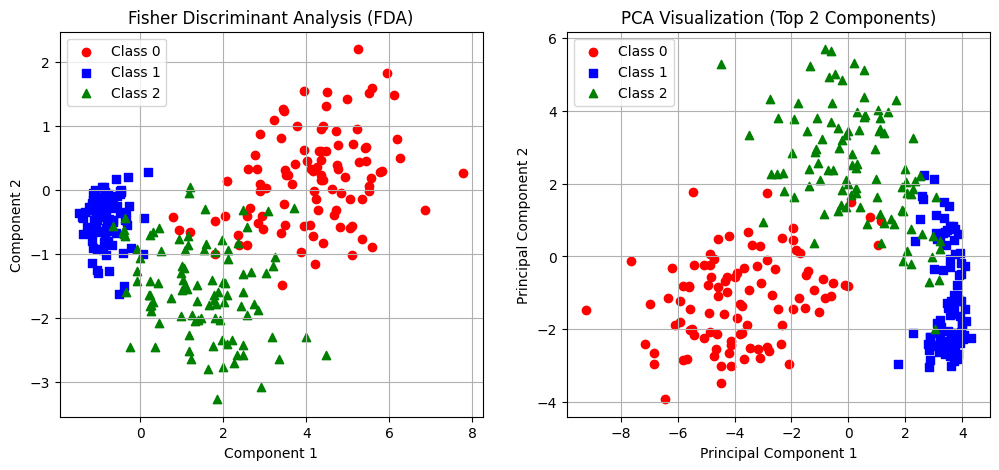

In [9]:
Y_PCA_2D = Y[:2, :]
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(Y_train_Fischer[0, i*100:(i+1)*100], Y_train_Fischer[1, i*100:(i+1)*100],
                color=color, marker=marker, label=f'Class {i}')
plt.title("Fisher Discriminant Analysis (FDA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(Y_PCA_2D[0, i*100:(i+1)*100], Y_PCA_2D[1, i*100:(i+1)*100],
                color=color, marker=marker, label=f'Class {i}')
plt.title("PCA Visualization (Top 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

